# Ujian Tengah Semester Computational Finance
---

**Dibuat oleh:**
- Dennis Jonathan (23101910027)

*S1 Business Mathematics 2019 - Universitas Prasetiya Mulya*

## 1. Prerequisites

### 1.1. Importing Some Libraries

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from datetime import date

# Importing plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preventing warning pop ups
import warnings
warnings.filterwarnings('ignore')

# Matplotlib settings
%matplotlib inline

# Changing the plot style
sns.set_style('whitegrid')

### 1.2. Importing the Data

In [2]:
# Reading the data in
aapl = pd.read_csv('apple_stock.csv')

# Renaming the columns
aapl.rename(columns = str.lower, inplace = True)

# Previewing the first five data
aapl.head()

,date,close
0,2021-04-30,131.460007
1,2021-05-03,132.539993
2,2021-05-04,127.849998
3,2021-05-05,128.100006
4,2021-05-06,129.740005


### 1.3. Fixing the Data Formats

In [3]:
# Converting the date column into datetime
aapl['date'] = pd.to_datetime(aapl['date'])

# Changing the index to the date column
aapl.set_index('date', inplace = True, drop = True)

# Previewing the changes
aapl.head()

,close
date,
2021-04-30,131.460007
2021-05-03,132.539993
2021-05-04,127.849998
2021-05-05,128.100006
2021-05-06,129.740005


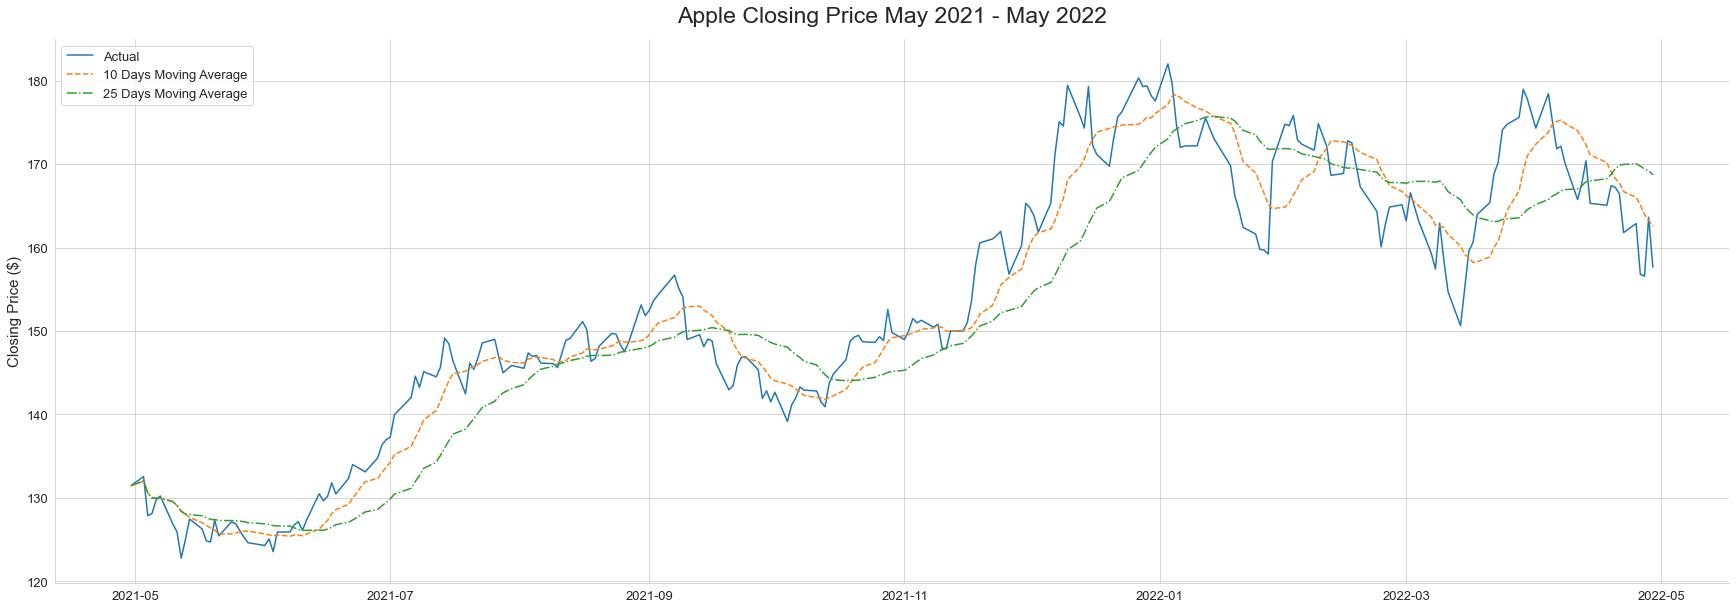

In [4]:
# Setting up the figure
plt.figure(figsize = (30, 10))

# Plotting the data
plt.plot(aapl['close'], label = 'Actual')
plt.plot(aapl['close'].rolling(10, min_periods = 1).mean(), label = '10 Days Moving Average', linestyle = 'dashed')
plt.plot(aapl['close'].rolling(25, min_periods = 1).mean(), label = '25 Days Moving Average', linestyle = 'dashdot')

# Plot settings
plt.title('Apple Closing Price May 2021 - May 2022', fontsize = 23, y = 1.02)
plt.ylabel('Closing Price ($)', fontsize = 15)
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.legend(fontsize = 13)
sns.despine()

# Saving the plot
plt.savefig('Graphs\\actual.png', transparent = True, dpi = 500)

# Displaying the plot
plt.show()

## 2. Geometric Brownian Motion

### 2.1. Calculating the Geometric Return

In [5]:
# Calculating the geometric return
geometric_return = -np.log(aapl.shift(1)/aapl)

# Calculating the mu and sigma
sigma = (np.std(geometric_return) * np.sqrt(252))[0]
mu = (np.mean(geometric_return) * 252)[0]

# Printing the mu and sigma
print(f'The drift constant is {mu} and the volatility is {sigma}')

The drift constant is 0.18840336497471433 and the volatility is 0.25801635733908607


### 2.2. Importing the Function to Calculate the Geometric Return

In [6]:
# Importing the geo_bm function from helper_functions
from helper_functions import geo_bm

### 2.3. Using the Function to Simulate the Next 180 Days (6 Months)

In [7]:
# Using the function to find the first simulation
sim_1 = geo_bm(aapl['close'], mu, sigma, 180, dt = 1/252, seed = True, rep = 10)

# Resetting the index
sim_1.set_index(pd.date_range(start = aapl.index[-1], periods = 180, freq = 'b'), inplace = True)

# Previewing the first five data
sim_1.head()

,0,1,2,3,4,5,6,7,8,9
2022-04-29,157.649994,157.649994,157.649994,157.649994,157.649994,157.649994,157.649994,157.649994,157.649994,157.649994
2022-05-02,162.356902,158.797362,160.297730,163.620111,162.630269,155.281685,160.223104,157.380257,157.503442,158.824313
2022-05-03,162.859172,162.717181,162.414232,164.066629,163.930294,156.242893,164.284371,156.973655,158.425332,156.751889
2022-05-04,156.356469,164.578034,164.835468,162.220654,170.218073,152.706976,164.529562,156.613851,162.543239,160.660604
2022-05-05,156.867975,165.716572,162.595548,157.198639,169.384832,153.210033,167.978237,159.824085,161.643981,159.992708


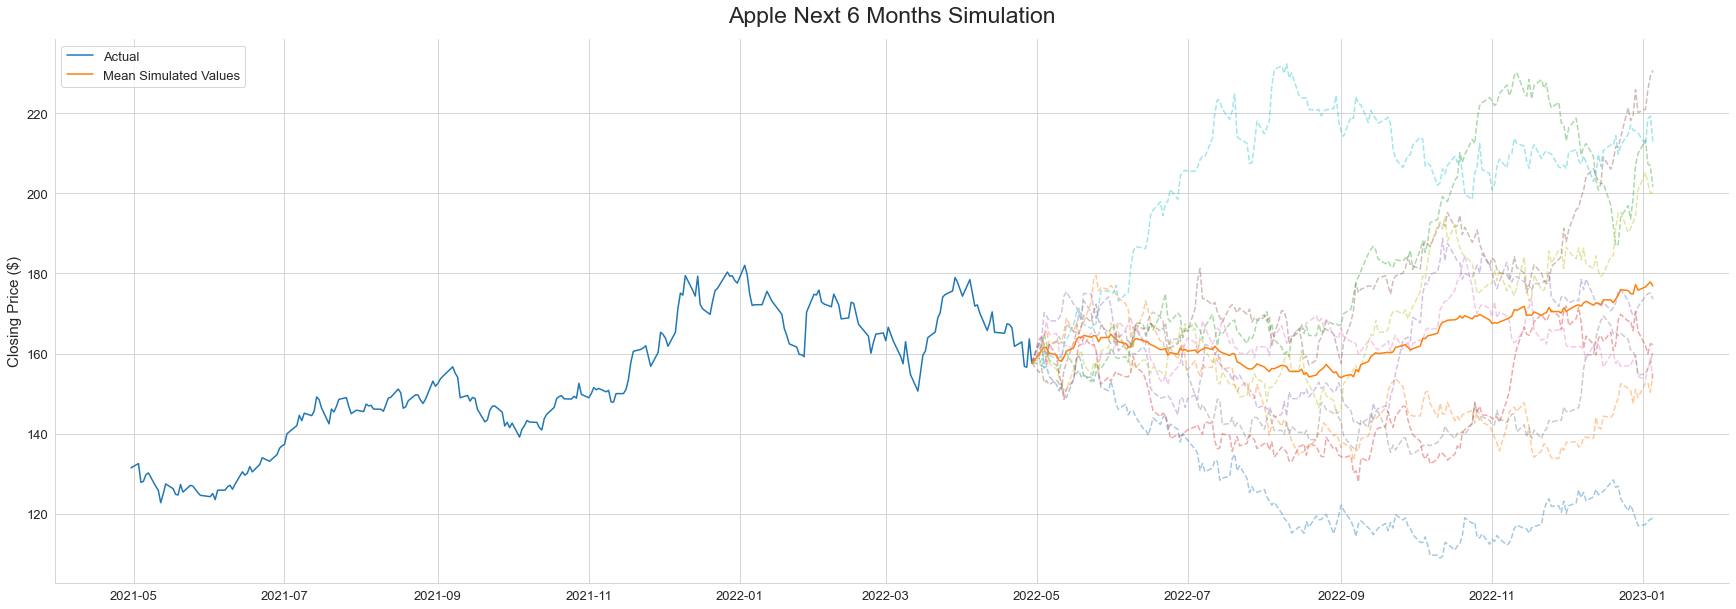

In [8]:
# Setting up the figure
plt.figure(figsize = (30, 10))

# Plotting the data
plt.plot(sim_1, linestyle = 'dashed', alpha = 0.4)
plt.plot(aapl['close'], label = 'Actual')
plt.plot(sim_1.mean(axis = 1), label = 'Mean Simulated Values')

# Plot settings
plt.title('Apple Next 6 Months Simulation', fontsize = 23, y = 1.02)
plt.ylabel('Closing Price ($)', fontsize = 15)
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.legend(fontsize = 13)
sns.despine()

# Saving the plot
plt.savefig('Graphs\sim_1.png', transparent = True, dpi = 500)

# Displaying the plot
plt.show()

### 2.4. Using the Function to Simulate the Next 104 Weeks

In [9]:
# Using the function for the second simulation
sim_2 = geo_bm(aapl['close'], mu, sigma, 104, dt = 1/52, seed = True, rep = 10)

# Resetting the index
sim_2.set_index(pd.date_range(start = aapl.index[-1], periods = 104, freq = 'W'), inplace = True)

# Previewing the first five data
sim_2.head()

,0,1,2,3,4,5,6,7,8,9
2022-05-01,157.649994,157.649994,157.649994,157.649994,157.649994,157.649994,157.649994,157.649994,157.649994,157.649994
2022-05-08,168.530888,160.503907,163.861270,171.430959,169.156195,152.785208,163.693383,157.367662,157.638947,160.563882
2022-05-15,170.016608,169.690461,168.995748,172.803885,172.487933,155.181472,173.309150,156.783732,159.993328,156.296541
2022-05-22,155.737546,174.336242,174.937120,168.886264,187.759750,147.847381,174.223228,156.302460,169.626465,165.331498
2022-05-29,157.171791,177.352596,170.082631,157.902047,186.110003,149.216445,182.724741,163.765870,167.899095,164.146473


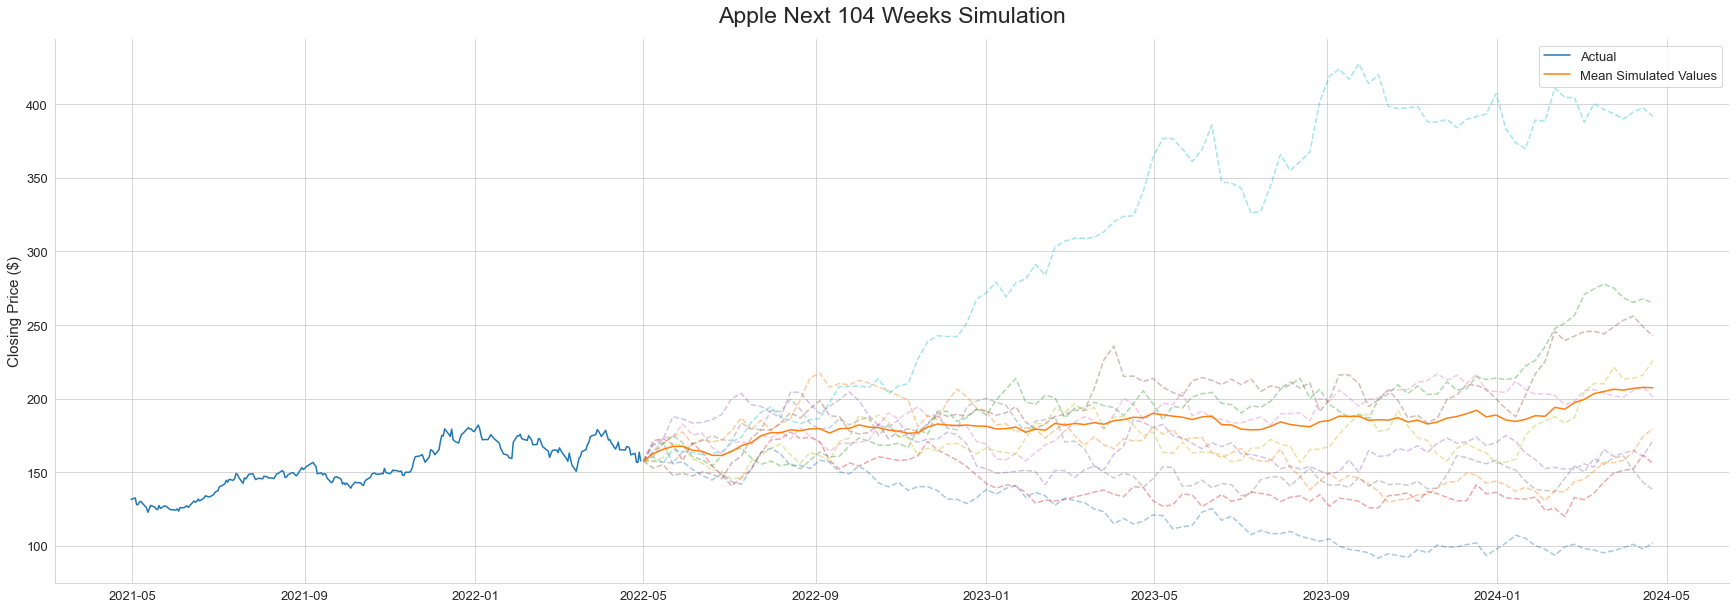

In [10]:
# Setting up the figure
plt.figure(figsize = (30, 10))

# Plotting the data
plt.plot(sim_2, linestyle = 'dashed', alpha = 0.4)
plt.plot(aapl['close'], label = 'Actual')
plt.plot(sim_2.mean(axis = 1), label = 'Mean Simulated Values')

# Plot settings
plt.title('Apple Next 104 Weeks Simulation', fontsize = 23, y = 1.02)
plt.ylabel('Closing Price ($)', fontsize = 15)
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.legend(fontsize = 13)
sns.despine()

# Saving the plot
plt.savefig('Graphs\sim_2.png', transparent = True, dpi = 500)

# Displaying the plot
plt.show()

## 3. Black-Scholes Option Pricing Modelling

Analysis of Black-Scholes option pricing model will be done on Apple's options with expiration date set on the 21st of October 2022. The data was taken on May 2nd, 2022 at 17.00 WIB. According to [Trading Economics.com](https://tradingeconomics.com/united-states/interest-rate#:~:text=Interest%20Rate%20in%20the%20United%20States%20is%20expected%20to%20be,macro%20models%20and%20analysts%20expectations) United States' yearly interest rate per May 2nd, 2022 is 0.5%

### 3.1. Importing Some Functions and Constants

In [11]:
from helper_functions import clean_option_data, bs, payoff_profit, plot_payoff_profit

In [12]:
# Calculating the continuous interest rate
ir = np.log(1 + 0.005)

# Printing the result
print(f'The continuous annual interest rate is {ir}')

The continuous annual interest rate is 0.004987541511038968


In [13]:
# Calculating t
t = (date(2022, 10, 21) - date(2022, 5, 2)).days / 365

# Printing the result
print(f'The period for each increment is {t}')

The period for each increment is 0.4712328767123288


In [14]:
# Defining the latest closed price
latest_closed =  aapl['close'][-1]

# Printing the result
print(f'The latest closed price is {latest_closed}')

The latest closed price is 157.64999389648438


In [15]:
# Finding the mean simulated price
mean_price = sim_1.loc['2022-10-21'].mean()

# Printing the result
print(f'The mean price from the GBM simulation is {mean_price}.')

The mean price from the GBM simulation is 169.44409802138625.


### 3.2. Call Options

In [16]:
# Importing call option data
calls = clean_option_data('calls_aapl_21-10-2022.csv')

In [17]:
# Calculating the Black-Scholes prices
calls = bs(data = calls, s_0 = latest_closed, kind = 'call', period = t, r = ir, volatility = sigma)

# Previewing the result
calls.head()

,last_trade_date,strike,last_price,bs_price,undervalued
0,2022-04-21 11:05:00,50.0,120.85,107.767371,False
1,2022-04-01 12:30:00,70.0,103.05,87.814329,False
2,2022-04-28 10:44:00,75.0,85.56,82.826112,False
3,2022-03-07 11:26:00,80.0,83.25,77.838077,False
4,2022-04-19 12:50:00,85.0,82.17,72.850723,False


#### 3.2.1. Long Call Options

In [18]:
# Calculating the payoff and profit for longing a call
calls_long = payoff_profit(calls, mean_price, r = ir, period = t, kind = 'call', option_type = 'long')

# Previewing the result of longing a call
calls_long.sort_values(by = 'profit', ascending = False).head(10)

,last_trade_date,strike,undervalued,payoff,bs_price_fv,last_price_fv,profit,bs_profit
7,2022-04-26 15:40:00,100.0,False,69,-58.055206,-59.780336,9.219664,10.944794
2,2022-04-28 10:44:00,75.0,False,94,-83.021007,-85.761328,8.238672,10.978993
11,2022-04-27 15:33:00,120.0,False,49,-38.650492,-41.146593,7.853407,10.349508
9,2022-04-26 10:48:00,110.0,False,59,-48.195910,-52.252665,6.747335,10.804090
8,2022-04-28 10:25:00,105.0,False,64,-53.102326,-57.484948,6.515052,10.897674
10,2022-04-25 11:17:00,115.0,False,54,-43.365737,-48.213182,5.786818,10.634263
3,2022-03-07 11:26:00,80.0,False,89,-78.021234,-83.445892,5.554108,10.978766
12,2022-04-28 09:49:00,125.0,False,44,-34.095925,-39.342358,4.657642,9.904075
6,2022-04-29 10:28:00,95.0,False,74,-63.033810,-69.392902,4.607098,10.966190
14,2022-04-29 14:40:00,135.0,False,34,-25.665680,-31.524004,2.475996,8.334320


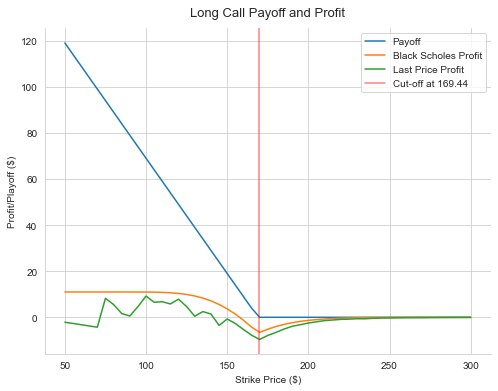

In [19]:
# Plotting the profit relative to strike price
plot_payoff_profit(data = calls_long, cutoff = mean_price, title = 'Long Call Payoff and Profit', save = True)

#### 3.2.2. Short Call Options

In [20]:
# Calculating the payoff and profit for shorting a call
calls_short = payoff_profit(calls, mean_price, r = ir, period = t, kind = 'call', option_type = 'short')

# Previewing the result of shorting a call
calls_short.sort_values(by = 'profit', ascending = False).head(10)

,last_trade_date,strike,undervalued,payoff,bs_price_fv,last_price_fv,profit,bs_profit
21,2022-04-29 15:51:00,170.0,False,0,6.552490,9.622589,9.622589,6.552490
22,2022-04-29 15:54:00,175.0,False,0,5.152230,7.868472,7.868472,5.152230
20,2022-04-29 15:50:00,165.0,False,-4,8.244617,11.757601,7.757601,4.244617
23,2022-04-29 15:59:00,180.0,False,0,4.009869,6.545365,6.545365,4.009869
19,2022-04-29 15:52:00,160.0,False,-9,10.259146,14.283531,5.283531,1.259146
24,2022-04-29 15:59:00,185.0,False,0,3.090400,5.112001,5.112001,3.090400
1,2022-04-01 12:30:00,70.0,False,-99,88.020961,103.292483,4.292483,-10.979039
25,2022-04-29 15:50:00,190.0,False,0,2.359708,3.909177,3.909177,2.359708
16,2022-04-29 10:08:00,145.0,False,-24,18.434068,27.504568,3.504568,-5.565932
26,2022-04-29 15:45:00,195.0,False,0,1.785961,3.217553,3.217553,1.785961


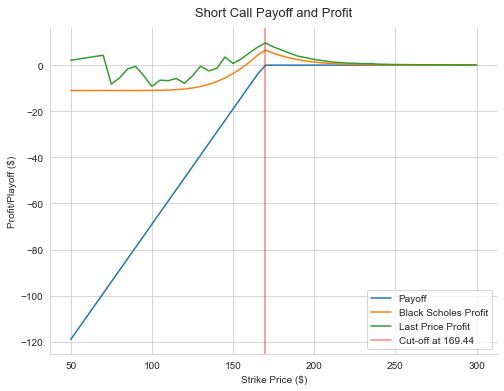

In [21]:
# Plotting the profit relative to strike price
plot_payoff_profit(data = calls_short, cutoff = mean_price, title = 'Short Call Payoff and Profit', save = True)

### 3.3. Put Options

In [22]:
# Importing the put data
puts = clean_option_data('puts_aapl_21-10-2022.csv')

# Calculating the Black-Scholes prices
puts = bs(data = puts, s_0 = latest_closed, kind = 'put', period = t, r = ir, volatility = sigma)

# Previewing the result
puts.head()

,last_trade_date,strike,last_price,bs_price,undervalued
0,2022-04-29 14:55:00,50.0,0.05,9.460537e-11,False
1,2022-04-28 14:15:00,60.0,0.11,6.744604e-08,False
2,2022-04-29 15:50:00,70.0,0.26,7.957569e-06,False
3,2022-04-29 15:53:00,75.0,0.37,5.350926e-05,False
4,2022-04-28 15:55:00,80.0,0.40,2.802877e-04,False


#### 3.3.1. Long Put Options

In [23]:
# Calculating the payoff and profit for longing a call
puts_long = payoff_profit(puts, mean_price, r = ir, period = t, kind = 'put', option_type = 'long')

# Previewing the result of longing a put
puts_long.sort_values(by = 'profit', ascending = False).head(10)

,last_trade_date,strike,undervalued,payoff,bs_price_fv,last_price_fv,profit,bs_profit
31,2022-03-30 14:15:00,215.0,True,45,-5.752077e+01,-39.643063,5.356937,-1.252077e+01
0,2022-04-29 14:55:00,50.0,False,0,-9.482799e-11,-0.050118,-0.050118,-9.482799e-11
1,2022-04-28 14:15:00,60.0,False,0,-6.760474e-08,-0.110259,-0.110259,-6.760474e-08
2,2022-04-29 15:50:00,70.0,False,0,-7.976294e-06,-0.260612,-0.260612,-7.976294e-06
3,2022-04-29 15:53:00,75.0,False,0,-5.363517e-05,-0.370871,-0.370871,-5.363517e-05
4,2022-04-28 15:55:00,80.0,False,0,-2.809472e-04,-0.400941,-0.400941,-2.809472e-04
5,2022-04-29 15:26:00,85.0,False,0,-1.191976e-03,-0.601412,-0.601412,-1.191976e-03
6,2022-04-29 15:59:00,90.0,False,0,-4.227109e-03,-0.862024,-0.862024,-4.227109e-03
7,2022-04-29 15:38:00,95.0,False,0,-1.285622e-02,-1.072518,-1.072518,-1.285622e-02
9,2022-04-29 09:36:00,105.0,False,0,-8.137222e-02,-1.252941,-1.252941,-8.137222e-02


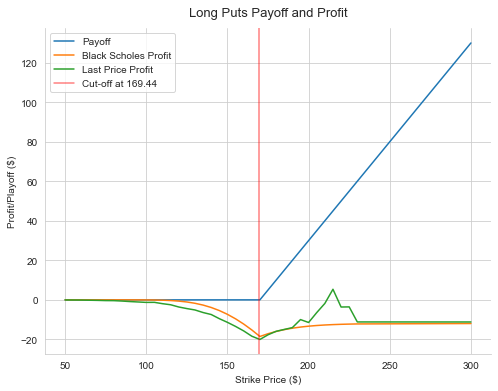

In [24]:
# Plotting the profit relative to strike price
plot_payoff_profit(data = puts_long, cutoff = mean_price, title = 'Long Puts Payoff and Profit', save = True)

#### 3.3.2. Short Put Options

In [25]:
# Calculating the payoff and profit for shorting a call
puts_short = payoff_profit(puts, mean_price, r = ir, period = t, kind = 'put', option_type = 'short')

# Previewing the result of longing a put
puts_short.sort_values(by = 'profit', ascending = False).head(10)

,last_trade_date,strike,undervalued,payoff,bs_price_fv,last_price_fv,profit,bs_profit
22,2022-04-29 15:05:00,170.0,False,0,18.531536,20.047061,20.047061,18.531536
21,2022-04-29 15:59:00,165.0,False,0,15.223664,18.393179,18.393179,15.223664
23,2022-04-29 14:27:00,175.0,False,-5,22.131277,22.673226,17.673226,17.131277
24,2022-04-29 14:17:00,180.0,True,-10,25.988916,25.910827,15.910827,15.988916
20,2022-04-29 15:53:00,160.0,False,0,12.238192,15.706872,15.706872,12.238192
25,2022-04-29 14:58:00,185.0,True,-15,30.069447,29.970356,14.970356,15.069447
26,2022-04-29 15:11:00,190.0,True,-20,34.338754,34.039910,14.039910,14.338754
19,2022-04-29 15:57:00,155.0,False,0,9.599501,13.441555,13.441555,9.599501
28,2022-04-29 12:07:00,200.0,True,-30,43.319546,41.447299,11.447299,13.319546
18,2022-04-29 15:57:00,150.0,False,0,7.323075,11.376707,11.376707,7.323075


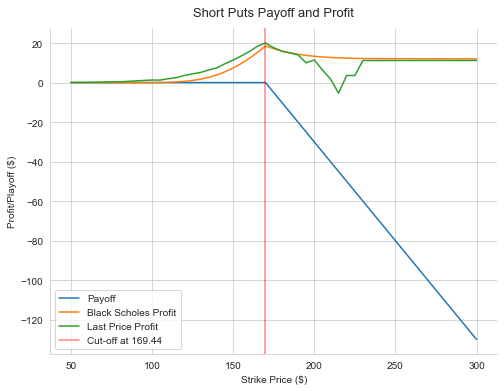

In [26]:
# Plotting the profit relative to strike price
plot_payoff_profit(data = puts_short, cutoff = mean_price, title = 'Short Puts Payoff and Profit', save = True)

## 4. Strategy

### 4.1. Short Straddle
1 call and 1 put at the same strike price of 170 dollars

In [27]:
# Pulling the 170 short call data
call_170 = calls_short.loc[calls['strike'] == 170]
display(call_170)

# Pulling the 170 short put data
put_170 = puts_short.loc[puts['strike'] == 170]
display(put_170)

,last_trade_date,strike,undervalued,payoff,bs_price_fv,last_price_fv,profit,bs_profit
21,2022-04-29 15:51:00,170.0,False,0,6.55249,9.622589,9.622589,6.55249


,last_trade_date,strike,undervalued,payoff,bs_price_fv,last_price_fv,profit,bs_profit
22,2022-04-29 15:05:00,170.0,False,0,18.531536,20.047061,20.047061,18.531536


In [28]:
# Initiating some empty arrays
payoff_call = np.array([])
payoff_put = np.array([])

# Initiating some hypothetical stock prices at time t
s_t = np.linspace(50, 500, 101)

# Exercising the options relative to the stock prices at time t and the strike price
for stock_price in s_t:
    if stock_price > 170:
        payoff_call = np.append(payoff_call, -stock_price + 170)
        payoff_put = np.append(payoff_put, 0)
    elif stock_price <= 170:
        payoff_call = np.append(payoff_call, 0)
        payoff_put = np.append(payoff_put, -170 + stock_price)

In [29]:
# Calculating the profit of the option using the future value of the last trading price
profit_call = call_170['last_price_fv'].values + payoff_call
profit_put = put_170['last_price_fv'].values + payoff_put

# Calculating the profit of the option using the future value of the Black Scholes price
profit_call_bs = call_170['bs_price_fv'].values + payoff_call
profit_put_bs = put_170['bs_price_fv'].values + payoff_put

In [30]:
# Calculating the join payoff, premiums, and profit using both last trading price and Black Scholes price
join_payoff = payoff_call + payoff_put
join_premium = call_170['last_price_fv'].values + put_170['last_price_fv'].values
join_premium_bs = call_170['bs_price_fv'].values + put_170['bs_price_fv'].values
join_profit = profit_put + profit_call
join_profit_bs = profit_put_bs + profit_call_bs

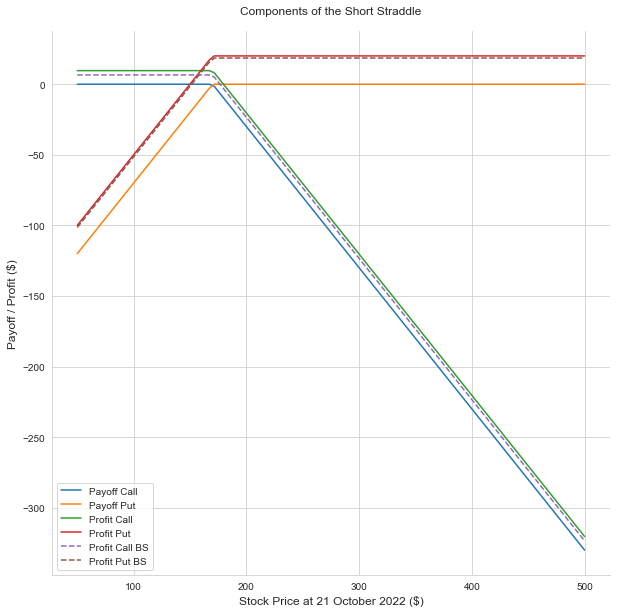

In [31]:
# Setting up the figure
plt.figure(figsize = (10, 10))

# Plotting the payoff curve
plt.plot(s_t, payoff_call, label = 'Payoff Call')
plt.plot(s_t, payoff_put, label = 'Payoff Put')

# Plotting the profit curve using future value of last price as premium
plt.plot(s_t, profit_call, label = 'Profit Call')
plt.plot(s_t, profit_put, label = 'Profit Put')

# Plotting the profit curve using the future value of the Black Scholes price as premium
plt.plot(s_t, profit_call_bs, label = 'Profit Call BS', linestyle = 'dashed')
plt.plot(s_t, profit_put_bs, label = 'Profit Put BS', linestyle = 'dashed')

# Plot settings
plt.title('Components of the Short Straddle', y = 1.02, fontsize = 12)
plt.xlabel('Stock Price at 21 October 2022 ($)', fontsize = 12)
plt.ylabel('Payoff / Profit ($)', fontsize = 12)
plt.legend()
sns.despine()

# Saving the plot
plt.savefig('Graphs\short_straddle_components.png', dpi = 500, transparent = True)

# Displaying the plot
plt.show()

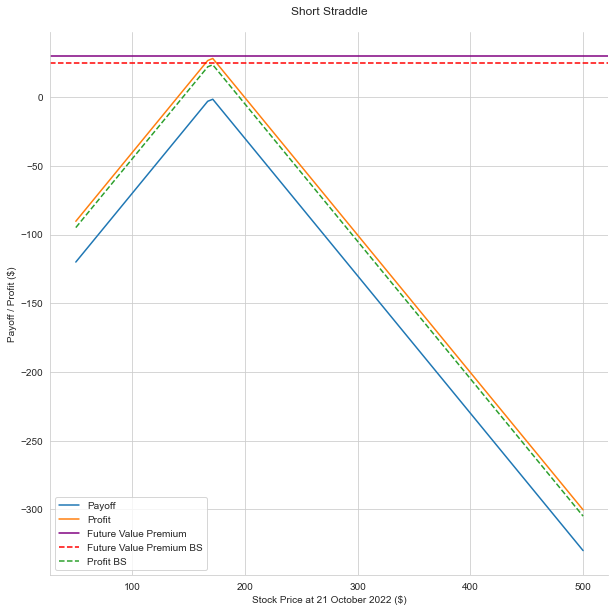

In [32]:
# Setting the figure
plt.figure(figsize = (10, 10))

# Plotting the join payoff, premiums, and profit using both last trading price and Black Scholes price
plt.plot(s_t, join_payoff, label = 'Payoff')
plt.plot(s_t, join_profit, label = 'Profit')
plt.axhline(join_premium, label = 'Future Value Premium', color = 'purple')
plt.axhline(join_premium_bs, label = 'Future Value Premium BS', linestyle = 'dashed', color = 'red')
plt.plot(s_t, join_profit_bs, label = 'Profit BS', linestyle = 'dashed')

# Plot settings
plt.title('Short Straddle', y = 1.02, fontsize = 12)
plt.xlabel('Stock Price at 21 October 2022 ($)')
plt.ylabel('Payoff / Profit ($)')
plt.legend()
sns.despine()

# Saving the plot
plt.savefig('Graphs\short_straddle.png', dpi = 500, transparent = True)

# Displaying the plot
plt.show()

### 4.2. Long Call Butterfly Spread
2 short call at 170 dollars
1 long call at 100 dollars
1 long call at 300 dollars


In [33]:
# Pulling the 100 long call data
call_100 = calls_long.loc[calls['strike'] == 100]
display(call_100)

# Pulling the 170 short call data
call_170 = calls_short.loc[calls['strike'] == 170]
display(call_170)

# Pulling the 300 long call data
call_300 = calls_long.loc[calls['strike'] == 300]
display(call_300)

,last_trade_date,strike,undervalued,payoff,bs_price_fv,last_price_fv,profit,bs_profit
7,2022-04-26 15:40:00,100.0,False,69,-58.055206,-59.780336,9.219664,10.944794


,last_trade_date,strike,undervalued,payoff,bs_price_fv,last_price_fv,profit,bs_profit
21,2022-04-29 15:51:00,170.0,False,0,6.55249,9.622589,9.622589,6.55249


,last_trade_date,strike,undervalued,payoff,bs_price_fv,last_price_fv,profit,bs_profit
44,2022-04-29 15:13:00,300.0,False,0,-0.001389,-0.070165,-0.070165,-0.001389


In [34]:
# Initiating some empty arrays
payoff_call_100 = np.array([])
payoff_call_170 = np.array([])
payoff_call_300 = np.array([])

# Initiating some hypothetical stock prices at time t
s_t = np.linspace(50, 500, 101)

# Exercising the options relative to the stock prices at time t and the strike price
for stock_price in s_t:
    if stock_price < 100:
        payoff_call_100 = np.append(payoff_call_100, 0)
        payoff_call_170 = np.append(payoff_call_170, 0)
        payoff_call_300 = np.append(payoff_call_300, 0)
    elif 100 <= stock_price < 170:
        payoff_call_100 = np.append(payoff_call_100, stock_price - 100)
        payoff_call_170 = np.append(payoff_call_170, 0)
        payoff_call_300 = np.append(payoff_call_300, 0)
    elif 170 <= stock_price < 300:
        payoff_call_100 = np.append(payoff_call_100, stock_price - 100)
        payoff_call_170 = np.append(payoff_call_170, 2*(-stock_price + 170))
        payoff_call_300 = np.append(payoff_call_300, 0)
    elif stock_price >= 300:
        payoff_call_100 = np.append(payoff_call_100, stock_price - 100)
        payoff_call_170 = np.append(payoff_call_170, 2*(-stock_price + 170))
        payoff_call_300 = np.append(payoff_call_300, stock_price - 300)

In [35]:
# Calculating the profit of the option using the future value of the last trading price
profit_call_100 = call_100['last_price_fv'].values + payoff_call_100
profit_call_170 = 2 * call_170['last_price_fv'].values + payoff_call_170
profit_call_300 = call_300['last_price_fv'].values + payoff_call_300

# Calculating the profit of the option using the future value of the Black Scholes price
profit_call_100_bs = call_100['bs_price_fv'].values + payoff_call_100
profit_call_170_bs = 2 * call_170['bs_price_fv'].values + payoff_call_170
profit_call_300_bs = call_300['bs_price_fv'].values + payoff_call_300

In [36]:
# Calculating the join payoff, premiums, and profit using both last trading price and Black Scholes price
join_payoff = payoff_call_100 + payoff_call_170 + payoff_call_300
join_premium = call_100['last_price_fv'].values + 2 * call_170['last_price_fv'].values + call_300['last_price_fv'].values
join_premium_bs = call_100['bs_price_fv'].values + 2 * call_170['bs_price_fv'].values + call_300['bs_price_fv'].values
join_profit = profit_call_100 + profit_call_170 + profit_call_300
join_profit_bs = profit_call_100_bs + profit_call_170_bs + profit_call_300_bs

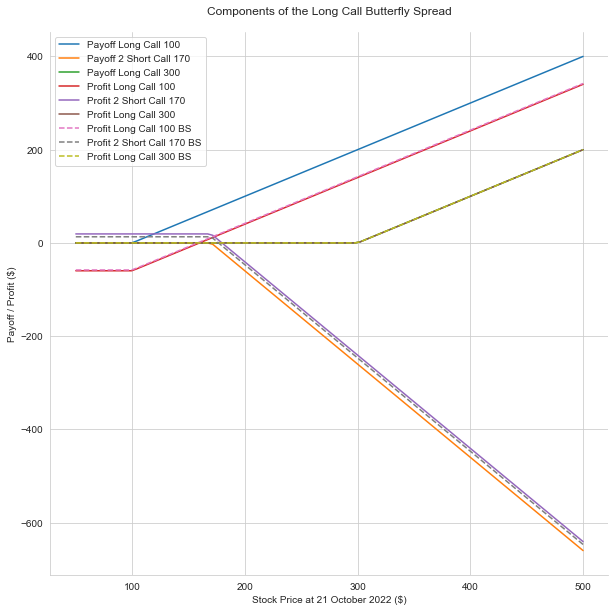

In [37]:
# Setting up the figure
plt.figure(figsize = (10, 10))

# Plotting the payoff curve
plt.plot(s_t, payoff_call_100, label = 'Payoff Long Call 100')
plt.plot(s_t, payoff_call_170, label = 'Payoff 2 Short Call 170')
plt.plot(s_t, payoff_call_300, label = 'Payoff Long Call 300')

# Plotting the profit curve using future value of last price as premium
plt.plot(s_t, profit_call_100, label = 'Profit Long Call 100')
plt.plot(s_t, profit_call_170, label = 'Profit 2 Short Call 170')
plt.plot(s_t, profit_call_300, label = 'Profit Long Call 300')

# Plotting the profit curve using the future value of the Black Scholes price as premium
plt.plot(s_t, profit_call_100_bs, label = 'Profit Long Call 100 BS', linestyle = 'dashed')
plt.plot(s_t, profit_call_170_bs, label = 'Profit 2 Short Call 170 BS', linestyle = 'dashed')
plt.plot(s_t, profit_call_300_bs, label = 'Profit Long Call 300 BS', linestyle = 'dashed')

# Plot settings
plt.title('Components of the Long Call Butterfly Spread', y = 1.02, fontsize = 12)
plt.xlabel('Stock Price at 21 October 2022 ($)')
plt.ylabel('Payoff / Profit ($)')
plt.legend()
sns.despine()

# Saving the plot
plt.savefig('Graphs\long_butterfly_components.png', dpi = 500, transparent = True)

# Displaying the plot
plt.show()

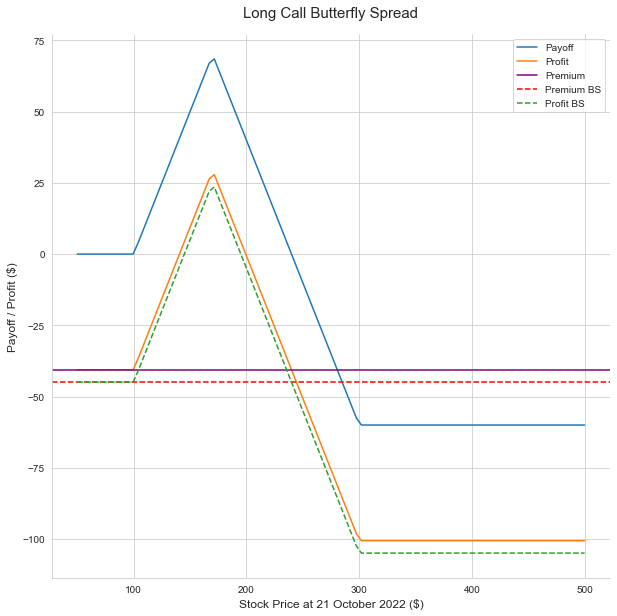

In [38]:
# Setting the figure
plt.figure(figsize = (10, 10))

# Plotting the join payoff, premiums, and profit using both last trading price and Black Scholes price
plt.plot(s_t, join_payoff, label = 'Payoff')
plt.plot(s_t, join_profit, label = 'Profit')
plt.axhline(join_premium, label = 'Premium', color = 'purple')
plt.axhline(join_premium_bs, label = 'Premium BS', linestyle = 'dashed', color = 'red')
plt.plot(s_t, join_profit_bs, label = 'Profit BS', linestyle = 'dashed')

# Plot settings
plt.title('Long Call Butterfly Spread', y = 1.02, fontsize = 15)
plt.xlabel('Stock Price at 21 October 2022 ($)', fontsize = 12)
plt.ylabel('Payoff / Profit ($)', fontsize = 12)
plt.legend()
sns.despine()

# Saving the plot
plt.savefig('Graphs\long_butterfly.png', dpi = 500, transparent = True)

# Displaying the plot
plt.show()